In [99]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# **Question 2: Sampling**

## Part A

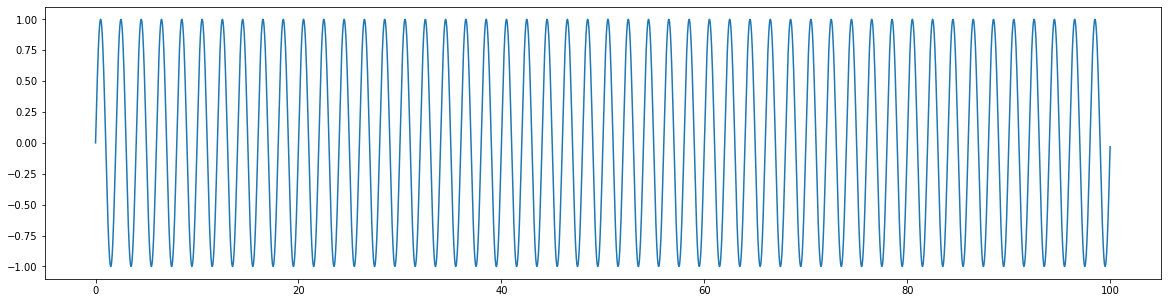

In [20]:
x = np.arange(0, 100, 0.01)
y = np.sin(x * np.pi)

fig = plt.figure(figsize=(20, 5))
plt.plot(x, y)

## Part B

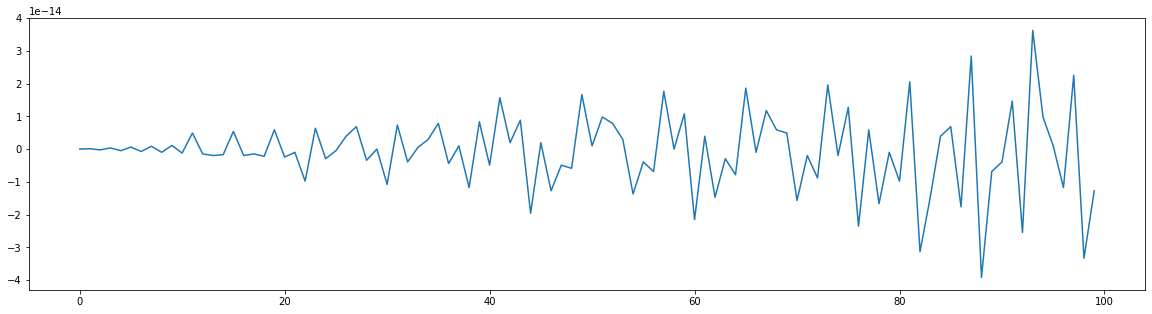

In [113]:
x = np.arange(0, 100, 0.01)
x = x[::100]
y = np.sin(x * np.pi)

fig = plt.figure(figsize=(20, 5))
plt.plot(x, y)

## Part C

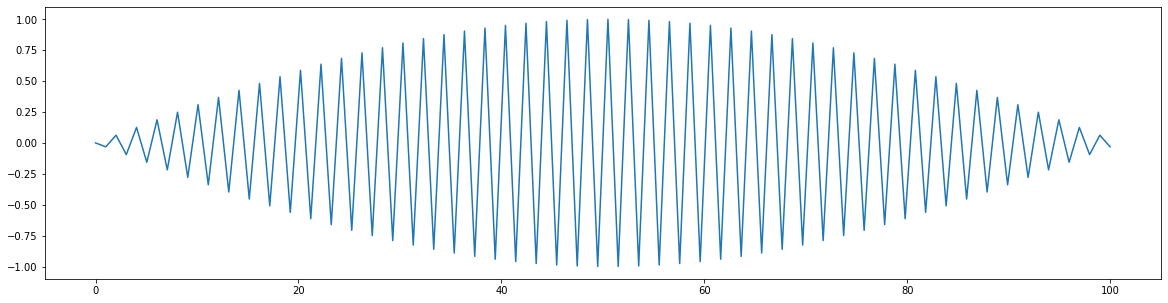

In [21]:
x = np.arange(0, 100, 0.01)
x = x[::101]
y = np.sin(x * np.pi)

fig = plt.figure(figsize=(20, 5))
plt.plot(x, y)

## Part D

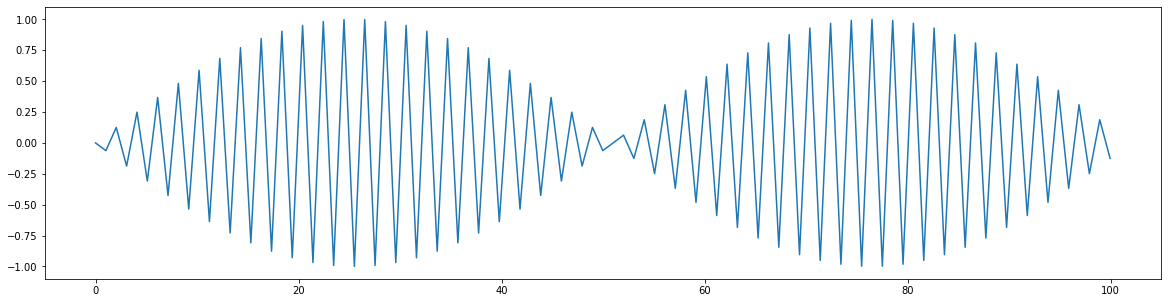

In [22]:
x = np.arange(0, 100, 0.01)
x = x[::102]
y = np.sin(x * np.pi)

fig = plt.figure(figsize=(20, 5))
plt.plot(x, y)

# **Question 3: Hyperspectral Image**

## Part A

In [80]:
# sRGB wavelengths -> red: 612nm     green: 549nm      blue: 464nm
# channel numbers  -> red: 44        green: 35         blue: 18

(-0.5, 1279.5, 306.5, -0.5)

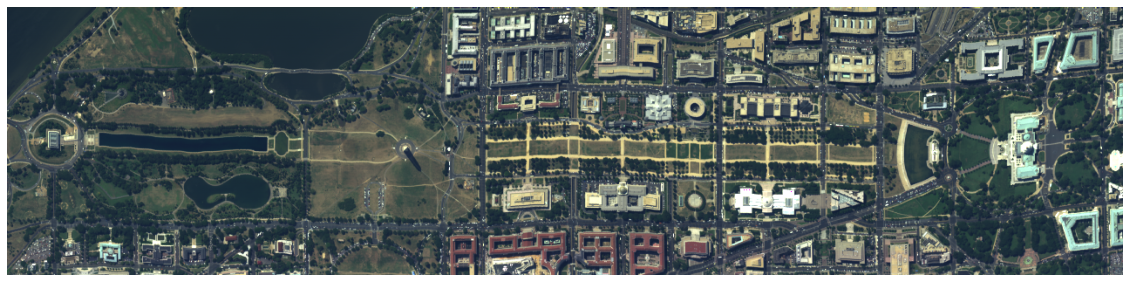

In [101]:
dc = tifffile.imread('DC.tif').transpose((2, 1, 0)).astype(np.float64)

rgb_image = dc[:, :, [43, 34, 17]]
rgb_image = (rgb_image - rgb_image.min())/(rgb_image.max() - rgb_image.min())
rgb_image = rgb_image * 6 - 3.05
rgb_image[rgb_image > 1] = 1
rgb_image[rgb_image < 0] = 0

fig = plt.figure(figsize=(20, 10))
plt.imshow(rgb_image)
plt.axis('off')

## Part B

In [103]:
shape = dc.shape[:2]
channels = dc.shape[2]

pca = PCA(n_components=3)
pca.fit(dc.reshape((-1, channels)))
image_3c = pca.transform(dc.reshape((-1, channels)))
image_3c = image_3c.reshape((shape[0], shape[1], 3))
print(image_3c.shape)

pca = PCA(n_components=1)
pca.fit(dc.reshape((-1, channels)))
image_1c = pca.transform(dc.reshape((-1, channels)))
image_1c = image_1c.reshape((shape[0], shape[1]))
print(image_1c.shape)


(307, 1280, 3)
(307, 1280)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Reduction to 1 channels')

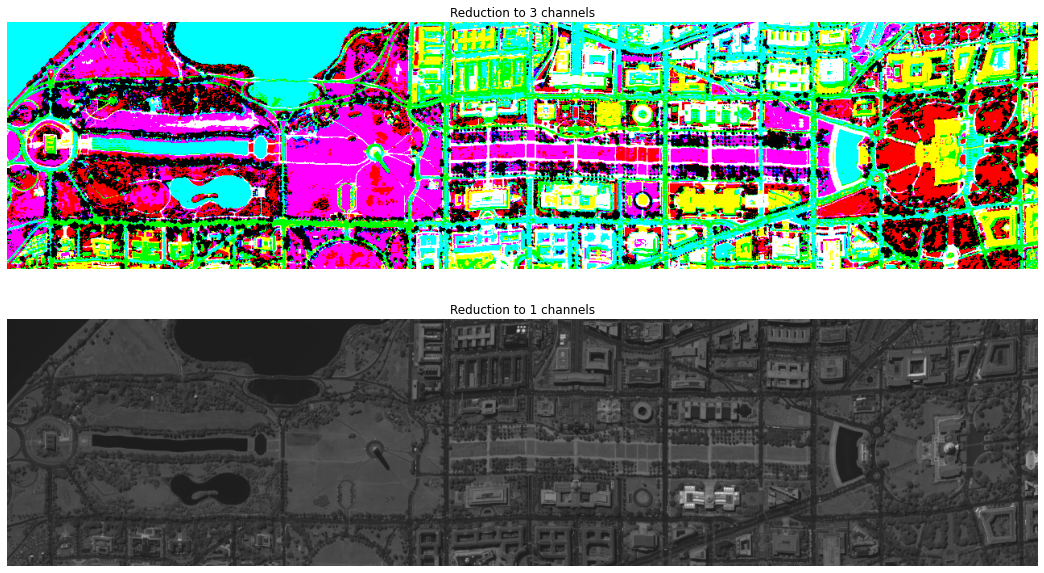

In [104]:
fig = plt.figure(figsize=(20, 10))

ax0 = plt.subplot(2, 1, 1)
ax0.imshow(image_3c)
ax0.axis('off')
ax0.set_title('Reduction to 3 channels')

ax1 = plt.subplot(2, 1, 2)
ax1.imshow(image_1c, cmap='gray')
ax1.axis('off')
ax1.set_title('Reduction to 1 channels')


## Part C

In [110]:
gt = tifffile.imread('GT.tif').T

shape = dc.shape[:2]
channels = dc.shape[2]

lda = LDA(n_components=3)
lda.fit(dc.reshape((-1, channels)), gt.reshape(-1))
image_3c = lda.transform(dc.reshape((-1, channels)))
image_3c = image_3c.reshape((shape[0], shape[1], 3))
print(image_3c.shape)

lda = LDA(n_components=1)
lda.fit(dc.reshape((-1, channels)), gt.reshape(-1))
image_1c = lda.transform(dc.reshape((-1, channels)))
image_1c = image_1c.reshape((shape[0], shape[1]))
print(image_1c.shape)

(307, 1280, 3)
(307, 1280)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Reduction to 1 channels')

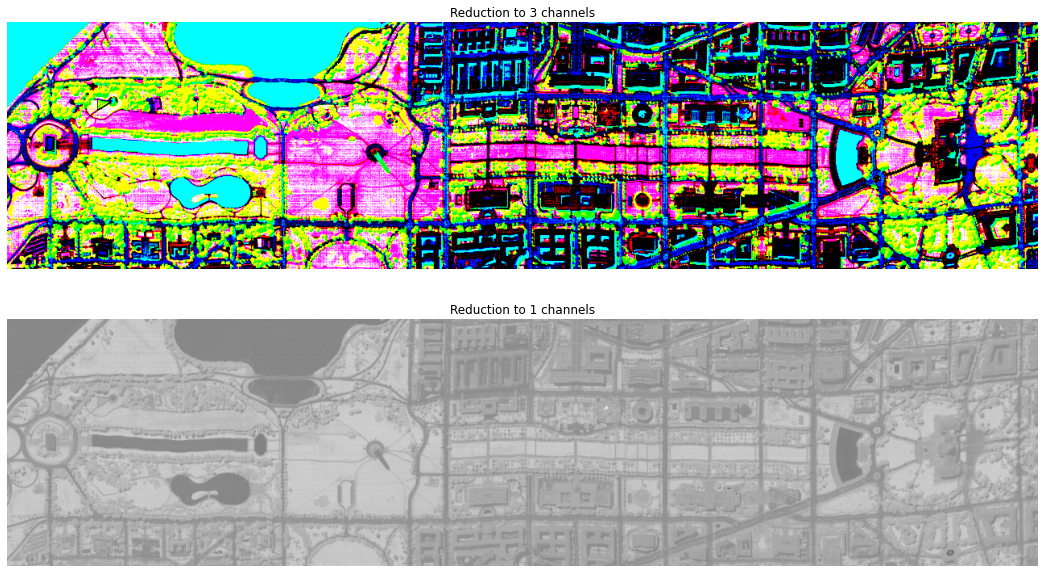

In [111]:
fig = plt.figure(figsize=(20, 10))

ax0 = plt.subplot(2, 1, 1)
ax0.imshow(image_3c)
ax0.axis('off')
ax0.set_title('Reduction to 3 channels')

ax1 = plt.subplot(2, 1, 2)
ax1.imshow(image_1c, cmap='gray')
ax1.axis('off')
ax1.set_title('Reduction to 1 channels')
